# Задача 14

## Постановка задачи
Используя данные о школьниках, выявить степень их алкогольной зависимости. В данных, взятых с UCI 'Students', содержится информация о 30 признаках для каждого школьника, включая социальные и гендерные, а также указана материальная обеспеченность и количество свободного времени. Выбрать на свой взгляд наиболее весомые признаки и предсказать степень употребления алкоголя по выходным или будним по шкале от 0 до 5.

## Этапы решения

1. Рассмотреть данные. 
2. Нормализовать признаки: преобразовать категориальные, при необходимости нормировать количественные.
3. Отобрать весомые признаки.
4. Убедиться, что признаки не зависят друг от друга.
3. Подобрать алгоритм для решения задачи.

## Решение задачи 

###  Ознакомление с данными

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [246]:
stud_por = pd.read_csv(r'C:\Users\T420\Documents\Problem14\student-por.csv')

In [247]:
stud_por.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [248]:
corr_matrix = stud_por.corr()

In [249]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr_matrix.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption(u"Корреляционная матрица признаков")\
    .set_precision(2)\
    .set_table_styles(magnify())

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1,-0.11,-0.12,0.034,-0.0084,0.32,-0.021,-0.0049,0.11,0.13,0.086,-0.0088,0.15,-0.17,-0.11,-0.11
Medu,-0.11,1,0.65,-0.27,0.097,-0.17,0.024,-0.02,0.0095,-0.007,-0.02,0.0046,-0.0086,0.26,0.26,0.24
Fedu,-0.12,0.65,1,-0.21,0.05,-0.17,0.02,0.0068,0.028,6.1e-05,0.038,0.045,0.03,0.22,0.23,0.21
traveltime,0.034,-0.27,-0.21,1,-0.063,0.098,-0.0095,0.00094,0.057,0.093,0.057,-0.048,-0.0081,-0.15,-0.15,-0.13
studytime,-0.0084,0.097,0.05,-0.063,1,-0.15,-0.0041,-0.069,-0.075,-0.14,-0.21,-0.056,-0.12,0.26,0.24,0.25
failures,0.32,-0.17,-0.17,0.098,-0.15,1,-0.063,0.11,0.045,0.11,0.082,0.036,0.12,-0.38,-0.39,-0.39
famrel,-0.021,0.024,0.02,-0.0095,-0.0041,-0.063,1,0.13,0.09,-0.076,-0.094,0.11,-0.09,0.049,0.09,0.063
freetime,-0.0049,-0.02,0.0068,0.00094,-0.069,0.11,0.13,1,0.35,0.11,0.12,0.085,-0.019,-0.094,-0.11,-0.12
goout,0.11,0.0095,0.028,0.057,-0.075,0.045,0.09,0.35,1,0.25,0.39,-0.016,0.085,-0.074,-0.079,-0.088
Dalc,0.13,-0.007,6.1e-05,0.093,-0.14,0.11,-0.076,0.11,0.25,1,0.62,0.059,0.17,-0.2,-0.19,-0.2


Будем считать коррелирующими признаки, имеющие коэффициент корреляции (обратной корреляции) более 10%.

Таким образом, признаки для дальнейшего исследования - age, studytime, failures, freetime, goout, absences и grades.
Также мы видим сильную корреляцию между G1, G2, G3. Нет смысла учитывать все три столбца. Заменим их одним: средним значением по трем столбцам и посмотрим на корреляцию в новой матрице. 

In [250]:
stud_por['Grades'] = (stud_por['G1'] + stud_por['G1'] + stud_por['G1'])/3

In [251]:
df = stud_por[['age', 'studytime', 'failures', 'freetime', 'goout', 'absences', 'Grades', 'Dalc', 'Walc']]

In [252]:
df.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption(u"Корреляционная матрица признаков")\
    .set_precision(2)\
    .set_table_styles(magnify())

,age,studytime,failures,freetime,goout,absences,Grades,Dalc,Walc
age,1,-0.0084,0.32,-0.0049,0.11,0.15,-0.17,0.13,0.086
studytime,-0.0084,1,-0.15,-0.069,-0.075,-0.12,0.26,-0.14,-0.21
failures,0.32,-0.15,1,0.11,0.045,0.12,-0.38,0.11,0.082
freetime,-0.0049,-0.069,0.11,1,0.35,-0.019,-0.094,0.11,0.12
goout,0.11,-0.075,0.045,0.35,1,0.085,-0.074,0.25,0.39
absences,0.15,-0.12,0.12,-0.019,0.085,1,-0.15,0.17,0.16
Grades,-0.17,0.26,-0.38,-0.094,-0.074,-0.15,1,-0.2,-0.16
Dalc,0.13,-0.14,0.11,0.11,0.25,0.17,-0.2,1,0.62
Walc,0.086,-0.21,0.082,0.12,0.39,0.16,-0.16,0.62,1


После замены стоблбцов G1, G2, G3 на Grades корреляция не изменилась. При этом, признаки обладающие наиболее сильной корреляцией: goout, absences, grades. Возможно, далее нам придётся как-то ещё отобрат признаки и эта информация может пригодиться.

Легко увидеть, что категориальные признаки не попали в матрицу. Заменим категориальные признаки на вещественные и посмотрим на их взаимосвязь с потреблением алкоголя.

In [253]:
print stud_por.columns

Index([u'school', u'sex', u'age', u'address', u'famsize', u'Pstatus', u'Medu',
       u'Fedu', u'Mjob', u'Fjob', u'reason', u'guardian', u'traveltime',
       u'studytime', u'failures', u'schoolsup', u'famsup', u'paid',
       u'activities', u'nursery', u'higher', u'internet', u'romantic',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences', u'G1', u'G2', u'G3', u'Grades'],
      dtype='object')


In [254]:
print 'schools: ', stud_por['school'].unique()
print 'sex: ', stud_por['sex'].unique()
print 'address: ', stud_por['address'].unique()
print 'famsize: ', stud_por['famsize'].unique()
print 'Pstatus: ', stud_por['Pstatus'].unique()
print 'Mjob: ', stud_por['Mjob'].unique()
print 'Fjob: ', stud_por['Fjob'].unique()
print 'reason: ', stud_por['reason'].unique()
print 'guardian: ', stud_por['guardian'].unique()
print 'schoolsup: ', stud_por['schoolsup'].unique()
print 'famsup: ', stud_por['famsup'].unique()
print 'paid: ', stud_por['guardian'].unique()
print 'activities: ', stud_por['guardian'].unique()
print 'nursery: ', stud_por['guardian'].unique()
print 'higher: ', stud_por['guardian'].unique()
print 'internet: ', stud_por['guardian'].unique()
print 'romantic: ', stud_por['guardian'].unique()

schools:  ['GP' 'MS']
sex:  ['F' 'M']
address:  ['U' 'R']
famsize:  ['GT3' 'LE3']
Pstatus:  ['A' 'T']
Mjob:  ['at_home' 'health' 'other' 'services' 'teacher']
Fjob:  ['teacher' 'other' 'services' 'health' 'at_home']
reason:  ['course' 'other' 'home' 'reputation']
guardian:  ['mother' 'father' 'other']
schoolsup:  ['yes' 'no']
famsup:  ['no' 'yes']
paid:  ['mother' 'father' 'other']
activities:  ['mother' 'father' 'other']
nursery:  ['mother' 'father' 'other']
higher:  ['mother' 'father' 'other']
internet:  ['mother' 'father' 'other']
romantic:  ['mother' 'father' 'other']


Категориальные признаки имеют небольшое (менее четырёх) количество различных значений. Закодируем их с помощью LabelEnccoder. Особено удачно для признаков yes/no. 

In [255]:
dataset = pd.DataFrame(columns =['age'])
dataset['age'] = stud_por['age']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(stud_por['school'])
dataset['school'] = le.transform(stud_por.school)

le.fit(stud_por['sex'])
dataset['sex'] = le.transform(stud_por.sex)

le.fit(stud_por['address'])
dataset['address'] = le.transform(stud_por.address)

le.fit(stud_por['famsize'])
dataset['famsize'] = le.transform(stud_por.famsize)

le.fit(stud_por['Pstatus'])
dataset['Pstatus'] = le.transform(stud_por.Pstatus)

le.fit(stud_por['Mjob'])
dataset['Mjob'] = le.transform(stud_por.Mjob)

le.fit(stud_por['Fjob'])
dataset['Fjob'] = le.transform(stud_por.Fjob)

le.fit(stud_por['reason'])
dataset['reason'] = le.transform(stud_por.reason)

le.fit(stud_por['guardian'])
dataset['guardian'] = le.transform(stud_por.guardian)

le.fit(stud_por['schoolsup'])
dataset['schoolsup'] = le.transform(stud_por.schoolsup)

le.fit(stud_por['famsup'])
dataset['famsup'] = le.transform(stud_por.famsup)

le.fit(stud_por['paid'])
dataset['paid'] = le.transform(stud_por.paid)

le.fit(stud_por['activities'])
dataset['activities'] = le.transform(stud_por.activities)

le.fit(stud_por['nursery'])
dataset['nursery'] = le.transform(stud_por.nursery)

le.fit(stud_por['higher'])
dataset['higher'] = le.transform(stud_por.higher)

le.fit(stud_por['internet'])
dataset['internet'] = le.transform(stud_por.internet)

le.fit(stud_por['romantic'])
dataset['romantic'] = le.transform(stud_por.romantic)


In [256]:
dataset['Walc'] = stud_por['Walc']
dataset['Dalc'] = stud_por['Dalc']

In [257]:
dataset.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption(u"Корреляционная матрица признаков")\
    .set_precision(2)\
    .set_table_styles(magnify())

,age,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,Walc,Dalc
age,1,0.087,-0.044,-0.026,-0.0025,-0.0056,-0.072,-0.051,-0.026,0.27,-0.17,-0.1,-0.0055,-0.054,-0.021,-0.27,0.013,0.18,0.086,0.13
school,0.087,1,-0.083,-0.35,0.022,0.028,-0.21,-0.082,-0.11,-0.062,-0.12,-0.064,-0.0079,-0.089,0.0047,-0.14,-0.24,0.072,0.014,0.047
sex,-0.044,-0.083,1,0.026,0.098,0.065,0.15,0.08,0.011,-0.037,-0.11,-0.13,0.079,0.12,-0.044,-0.058,0.066,-0.11,0.32,0.28
address,-0.026,-0.35,0.026,1,0.046,-0.095,0.16,-0.0065,-0.0024,-0.019,0.018,0.0056,-0.03,-0.0093,0.018,0.077,0.18,-0.031,-0.012,-0.047
famsize,-0.0025,0.022,0.098,0.046,1,-0.24,0.02,-0.059,0.032,0.00087,-0.056,-0.04,-0.05,-0.015,0.1,0.0045,0.013,-0.033,0.082,0.06
Pstatus,-0.0056,0.028,0.065,-0.095,-0.24,1,-0.029,0.054,-0.031,-0.17,-0.0095,0.01,0.016,0.1,-0.033,0.023,0.06,-0.054,0.071,0.042
Mjob,-0.072,-0.21,0.15,0.16,0.02,-0.029,1,0.2,0.059,0.0082,0.008,0.039,0.012,0.1,0.042,0.15,0.26,-0.074,0.026,0.05
Fjob,-0.051,-0.082,0.08,-0.0065,-0.059,0.054,0.2,1,0.043,-0.075,-0.013,-0.039,-0.021,0.018,-0.046,0.09,0.089,-0.0028,0.045,0.055
reason,-0.026,-0.11,0.011,-0.0024,0.032,-0.031,0.059,0.043,1,-0.066,0.048,0.011,-0.051,0.077,0.044,0.091,0.11,-0.051,0.011,-0.011
guardian,0.27,-0.062,-0.037,-0.019,0.00087,-0.17,0.0082,-0.075,-0.066,1,-0.041,0.016,0.072,0.014,-0.023,-0.11,-0.00041,0.11,-0.0083,0.023


Из  этой матрицы можно выделить корреляции с sex и higher.

### Получаем итоговый датасет.

In [258]:
data = pd.concat([dataset[['sex', 'higher']], stud_por[['age', 'studytime', 
                               'failures', 'freetime', 'goout', 'absences', 'Grades', 'Dalc', 'Walc']]], axis = 1)


In [259]:
data.head(5)

,sex,higher,age,studytime,failures,freetime,goout,absences,Grades,Dalc,Walc
0,0,1,18,2,0,3,4,4,0.0,1,1
1,0,1,17,2,0,3,3,2,9.0,1,1
2,0,1,15,2,0,3,2,6,12.0,2,3
3,0,1,15,3,0,2,2,0,14.0,1,1
4,0,1,16,2,0,3,2,0,11.0,1,2


Рассмотрим корреляцию признаков между собой, чтобы исключить взаимозависимые.

In [260]:

data.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption(u"Корреляционная матрица признаков")\
    .set_precision(2)\
    .set_table_styles(magnify())

,sex,higher,age,studytime,failures,freetime,goout,absences,Grades,Dalc,Walc
sex,1,-0.058,-0.044,-0.21,0.074,0.15,0.058,0.021,-0.1,0.28,0.32
higher,-0.058,1,-0.27,0.19,-0.31,-0.1,-0.069,-0.13,0.35,-0.13,-0.084
age,-0.044,-0.27,1,-0.0084,0.32,-0.0049,0.11,0.15,-0.17,0.13,0.086
studytime,-0.21,0.19,-0.0084,1,-0.15,-0.069,-0.075,-0.12,0.26,-0.14,-0.21
failures,0.074,-0.31,0.32,-0.15,1,0.11,0.045,0.12,-0.38,0.11,0.082
freetime,0.15,-0.1,-0.0049,-0.069,0.11,1,0.35,-0.019,-0.094,0.11,0.12
goout,0.058,-0.069,0.11,-0.075,0.045,0.35,1,0.085,-0.074,0.25,0.39
absences,0.021,-0.13,0.15,-0.12,0.12,-0.019,0.085,1,-0.15,0.17,0.16
Grades,-0.1,0.35,-0.17,0.26,-0.38,-0.094,-0.074,-0.15,1,-0.2,-0.16
Dalc,0.28,-0.13,0.13,-0.14,0.11,0.11,0.25,0.17,-0.2,1,0.62


Взаимная корреляция признаков не превышает 0.35. Будем считать, что признаки не зависят друг от друга. Хотя от freetime, вероятно, можно было избавиться: корреляция и логическая связь с полем goout. Да и связь age и failures было бы интересно проследить.



### Разделение датасета на обучающую и тестовую выборки

In [280]:
X = data.drop(columns = ['Dalc', 'Walc'])

In [281]:
from sklearn import preprocessing
# normalize the data attributes
X = preprocessing.normalize(X)

In [282]:
y_d = dataset['Dalc']
y_w = dataset['Walc']

In [283]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_w, y_test_w, y_train_d, y_test_d = train_test_split(X, y_w, y_d, test_size=0.3, random_state = 42)

### Классификация с помощью алгоритмов k ближайших соседей и логистической регрессии

In [284]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train_d)
# make predictions
expected = y_test_d
predicted = model.predict(X_test)
# summarize the fit of the model
print 'logistic regression\n'
print 'Accuracy: '
print (accuracy_score(expected,predicted))
print
print 'Confusion matrix: ' 
print (metrics.confusion_matrix(expected, predicted))

logistic regression

Accuracy: 
0.682051282051

Confusion matrix: 
[[133   0   0   0   0]
 [ 45   0   0   0   0]
 [ 10   0   0   0   0]
 [  3   0   0   0   0]
 [  4   0   0   0   0]]


In [343]:
from sklearn.neighbors import KNeighborsClassifier
# fit a k-nearest neighbor model to the data
model = KNeighborsClassifier(n_neighbors=7, weights='distance')
model.fit(X_train, y_train_d)
# make predictions
expected = y_test_d
predicted = model.predict(X_test)
# summarize the fit of the model
print 'k-means\n'
print 'Accuracy: '
print (accuracy_score(expected,predicted))
print
print 'Confusion matrix: ' 
print (metrics.confusion_matrix(expected, predicted))

k-means

Accuracy: 
0.641025641026

Confusion matrix: 
[[119  12   0   2   0]
 [ 38   5   2   0   0]
 [  9   0   1   0   0]
 [  2   1   0   0   0]
 [  2   2   0   0   0]]


### Вывод

В данной задаче лучше работает алгоритм k ближайших соседей. Метрика accuracy больше, а в confusionmatrix видно, что алгоритм определяет не один класс, как это делает логистическая регрессия, а поменьшей мере три. Вообще, логистическа регрессия на данной задаче показала себя не слишком хорошо: фактически, мы получили константные предсказания. 

Результативность k-means же зависит от количества рассматриваемых соседей. Это хорошо видно на графике ниже. В то время, как accuracy увеличивается, precision и recall уменьшаются. Таким образом, оптимальное количество соседей - 7. Это приблизительный максимум одновременно всех метрик. При увеличении количества соседей наш классификатор превращается в константный, что можно увидеть на Confusion Matrix.

In [309]:
accur = []
prec = []
rec = []
for i in range(20):
    i = i+1
    model = KNeighborsClassifier(n_neighbors=i, weights='distance')
    model.fit(X_train, y_train_d)
    expected = y_test_d
    predicted = model.predict(X_test)
    accur.append(accuracy_score(expected,predicted))
    prec.append(precision_score(expected, predicted, average='macro'))
    rec.append(recall_score(expected,predicted,  average='macro'))
    #print (metrics.confusion_matrix(expected, predicted))

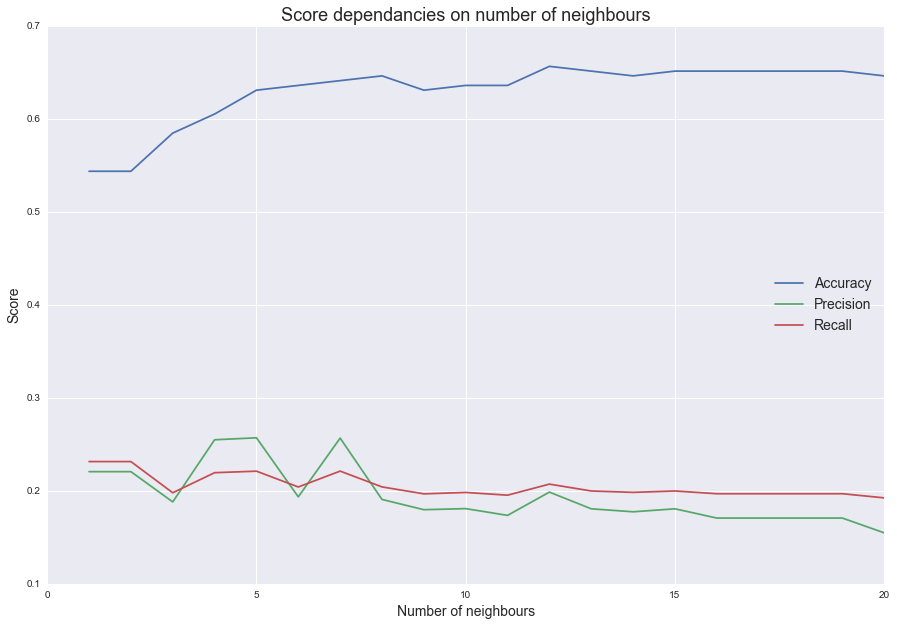

In [342]:
%matplotlib inline
x_ax = np.linspace(1, 20, num = 20)
axis_font = {'fontname':'Arial', 'size':'14'}
title_font = {'fontname':'Arial', 'size':'18'}
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 42})
plt.plot(x_ax, accur)
plt.plot(x_ax, prec)
plt.plot(x_ax, rec)
plt.xlabel('Number of neighbours', **axis_font)
plt.ylabel('Score', **axis_font)
plt.legend(['Accuracy', 'Precision', 'Recall'], loc='center right', prop={'size': 14})
plt.title('Score dependancies on number of neighbours', **title_font)
plt.show()